In [106]:
import random
import numpy as np
import ast
import matplotlib.pyplot as plt



# Fitness function: Define a custom fitness function for your sequences
def fitness_function(sequence, E0):
    # Example: Fitness is the number of '1's in the sequence
    E =sum([int(i) for i in list(sequence)])
    return 1/(1+np.exp(-E+E0))

# Generate initial population
def generate_population(N, l):
    return [''.join(random.choice('01') for _ in range(l)) for _ in range(N)]

# Selection: Proportional to fitness
def selection(population, fitnesses):
    selected = random.choices(population, weights=fitnesses, k=len(population))
    return selected

# Reproduction (Crossover and Mutation)
def reproduce(population, mutation_rate):
    new_population = []
    for parent in population:
        # Mutate sequence
        child = mutate(parent, mutation_rate)
        new_population.append(child)
    return new_population

# Mutation: Flip a bit with a given mutation rate
def mutate(sequence, mutation_rate):
    sequence = list(sequence)
    for i in range(len(sequence)):
        if random.random() < mutation_rate:
            sequence[i] = '1' if sequence[i] == '0' else '0'
    return ''.join(sequence)

# Evolutionary loop
def evolve(N, l, generations, mutation_rate, kappa):
    E0 = 5
    population = generate_population(N, l)
    mean_fitness = [np.mean([fitness_function(seq, E0) for seq in population])]
    for generation in range(generations):
#         print(E0)
        if generation%kappa==0 and generation>10:
            E0 += np.random.choice([-1,1])  
        # Calculate fitness for each sequence
        fitnesses = [fitness_function(seq, E0) for seq in population]
        
        # Select based on fitness
        selected_population = selection(population, fitnesses)
        
        # Reproduce to create a new population
        population = reproduce(selected_population, mutation_rate)
        mean_fitness.append(np.mean([fitness_function(seq, E0) for seq in population]))
        # Track and print the best sequence in each generation
#         best_sequence = max(population, key=fitness_function)
#         best_fitness = fitness_function(best_sequence, E0)
#         print(f"Generation {generation}: Best Sequence = {best_sequence}, Fitness = {best_fitness}")
    plt.plot(mean_fitness)

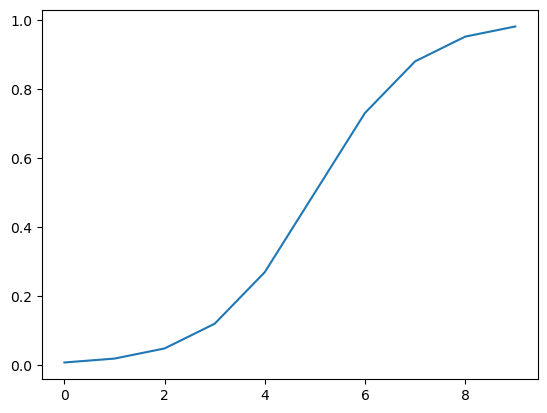

In [107]:
plt.plot(1/(1+np.exp(-np.arange(0, l)+5)))

(0.0, 1.0)

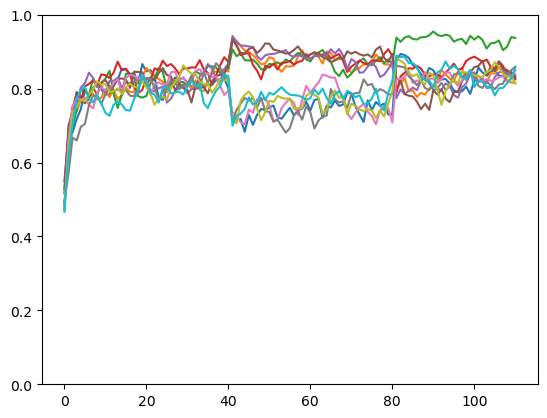

In [112]:
# Run the simulation
# Parameters
l = 10         # Length of each sequence
N = 100        # Population size
generations = 110  # Number of generations
mutation_rate = 0.05  # Probability of mutation per sequence

for j in range(10):
    evolve(N, l, generations, mutation_rate, 40)
plt.ylim(0, 1)


(0.0, 1.0)

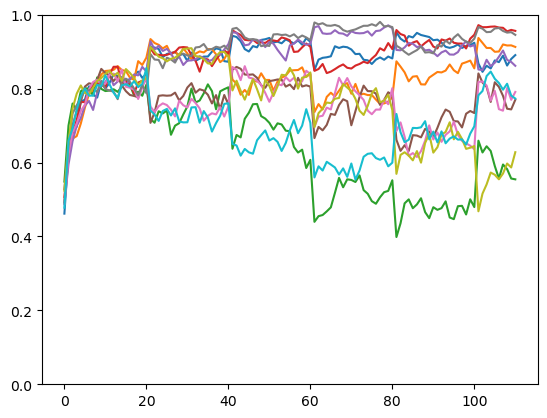

In [113]:
# Run the simulation
for j in range(10):
    evolve(N, l, generations, mutation_rate, 20)
plt.ylim(0, 1)


(0.0, 1.0)

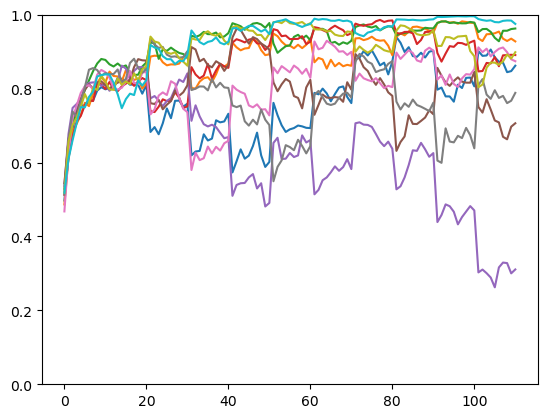

In [114]:
# Run the simulation
for j in range(10):
    evolve(N, l, generations, mutation_rate, 10)
plt.ylim(0, 1)


(0.0, 1.0)

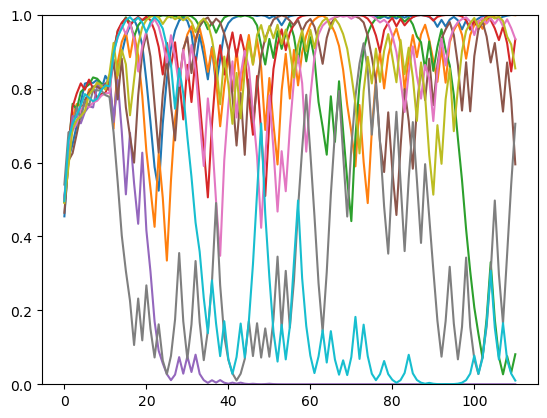

In [115]:
# Run the simulation
for j in range(10):
    evolve(N, l, generations, mutation_rate, 1)
plt.ylim(0, 1)
